# Przyrost populacji drożdży podczas fermentacji napojów alkoholowych

## 1. Wstęp
Napoje alkoholowe - każdemu znane, przez wielu uwielbiane. Nie od dziś stanowią one symbole wielu okazji, od eleganckiego obiadu, po świętowanie nowego roku. Aczkolwiek, pewnie nie każdy sobie zdaje sprawę z tego, że za ten dobytek kulturowy odpowiedzialne są drożdże. Ta praca będzie się skupiać na tych właśnie mikroorganizmach, i na tym jak one rozwijają się podczas fermentacji alkoholowej. Proces ten jest podobny w każdym ze znanych napojów z tej kategorii. Dlatego w tej pracy skupimy się na prawdopodobnie najpopularniejszym z nich, czyli piwie.
### 1.1 Jak wygląda proces warzenia piwa?<sup><a href="#ARbeermaking1">[1]</a><a href="#ARbeermaking2">[2]</a></sup>
Proces warzenia piwa, niezwykle ważny dla rozwoju cywilizacji, zaczyna się od słodu - wykiełkowane nasiona zbóż, zawierające enzymy rozbijające skrobię, występującą naturalnie w zbożu, na cukry proste. Jest to kluczowe dla procesu fermentacji, gdyż drożdże nie są w stanie konsumować cukrów złożonych. Enzymy te są aktywowane za pomocą ciepłej wody, jednocześnie tworząc zacier. Następnie z zacieru odsącza się brzeczkę, po czym ta jest gotowana z przyprawami (najczęściej chmielem), w celu sterylizacji oraz skoncentrowania cukrów w cieczy. Po ugotowaniu i szybkim schłodzeniu brzeczki przelewa się ją do sterylnego naczynia, oraz dodaje się drożdże, które fermentują cukry na alkohol i gaz, zamieniając brzeczkę w piwo. W tej pracy przyjrzymy się dokładniej temu ostatniemu procesowi, jak tylko odpowiemy sobie czym dokładnie jest fermentacja.
### 1.2 Czym jest fermentacja?<sup><a href="#PelczarFermentation">[3]</a></sup>
Fermentacją nazywamy proces chemiczny beztlenowego rozkładu cukrów. W przypadku rozpatrywanym w tym projekcie, produktami uzyskanymi podczas fermentacji są alkohol etylowy oraz dwutlenek węgla. Proces towarzyszył ludzkości od początku cywilizacji, ale to dopiero w XIX wieku został on odkryty i nazwany przez Louisa Pasteur. Pierwotnie fermentacja odnosiła się jedynie do pracy wykonywanej przez drożdże, jednakże dzisiaj znamy również inne organizmy utylizujące to zjawisko.


## 2. Zastosowanie matematycznego modelu w badaniu przyrostu drożdży w procesie fermentacji piwa
Do przedstawienia, jak zachowuje się populacja drożdży w brzeczce podczas procesu fermentacji piwa skorzystamy z modelu opracowanego przez B. de Andrés-Toro i innych<sup><a href="#AToroBeermodel">[4]</a><a href="#DynamicBeerModel">[5]</a></sup>. Model ten przedstawia, jak stężenia poszczególnych substancji w roztworze zmieniają się w czasie. Autorzy podzielili biomasę na trzy grupy, które odzwierciedlają poszczególne stany fizjologiczne drożdży podczas fermentacji: 
- Zalegająca biomasa $X_L$ (eng. lagged biomass) to drożdże, które jeszcze nie uczestniczą aktywnie w procesie fermentacji, lecz dopiero adaptują się do środowiska.
- Aktywna biomasa $X_A$ (eng. active biomass) to drożdże, które intensywnie rozmnażają się i fermentują przekształcając cukier w etanol oraz inne związki.
- Martwa biomasa $X_D$ (eng. dead biomass) to drożdże, które umarły - nie biorą już udziału w procesie fermentacji i osiadają na dnie.

Zależności między poszczególnymi grupami biomasy można opisać następującymi równaniami różniczkowymi:
$$ \frac{dX_L}{dt} = -\mu_L X_L,$$
$$ \frac{dX_A}{dt} = \mu_X X_A + \mu_L X_L - \mu_{DT} X_A, $$
$$ \frac{dX_D}{dt} = \mu_{DT} X_A - \mu_{SD} X_D,$$
gdzie:
- $\mu_L$ to szybkość, z jaką zalegająca biomasa przechodzi w aktywną biomasę,
- $\mu_X$ to szybkość, z jaką rozmnaża się aktywna biomasa,
- $\mu_{DT}$ to szybkość, z jaką aktywna biomasa obumiera i przestaje fermentować,
- $\mu_{SD}$ to szybkość, z jaką martwa biomasa opada na dno fermentatora.

Współczynniki $\mu_X$ i $\mu_{SD}$ są zależne od stężenia cukru $S$ oraz etanolu $E$. Wyrażają się one wzorami:
$$\mu_X = \frac{\mu_{X_0}S}{0.5S_0 + E},$$
$$\mu_{SD} = \frac{\mu_{SD_0}0.5S_0}{0.5S_0 + E}.$$
Aktywna biomasa zużywa cukier do produkcji etanolu, stąd konsumpcję cukru $S$ oraz przyrost etanolu $E$ można wyrazić posługując się równaniem Monoda<sup><a href="#lecture">[6]</a></sup>:
$$\frac{dS}{dt} = -\mu_S X_A,$$
$$\frac{dE}{dt} = \mu_E X_A, $$
gdzie współczynnik $\mu_S$  to szybkość z jaką biomasa konsumuje cukier, a $\mu_E$ to szybkość produkcji etanolu:
$$\mu_S = \frac{\mu_{S_0}S}{K_S + S},$$
$$\mu_E = \frac{\mu_{E_0}S}{K_E + S}\left(1 - \frac{E}{0.5S_0}\right).$$
Stałe $K_S$ i $K_E$ oznaczają stężenia dla których odpowiednio $\mu_S$ i $\mu_E$ osiągną połowę swoich maksymalnych wartości określonych przez $\mu_{S_0}$ i $\mu_{E_0}$.


## 3. Rozwiązanie modelu
Do rozwiązania powyższego modelu posłużymy się dwoma metodami numerycznymi - metodą Eulera oraz metodą Rungego-Kutty<sup><a href="#equations">[7]</a></sup> zaimplementowanymi w języku programowania Python. Następnie przeanalizujemy wyniki badając powstałe wykresy.

### 3.1 Warunki początkowe i wartości stałych
Do ustalenia warunków początkowych posłużymy się przykładowym przepisem na uwarzenie piwa<sup><a href="#recipe">[8]</a></sup>. We współczesnym piwowarstwie stosuje się startery drożdżowe, dzięki którym drożdże zostają aktywowane jeszcze przed dodaniem do brzeczki, co pozwala przyspieszyć proces fermentacji<sup><a href="#YeastActive">[9]</a></sup>. Załóżmy więc, że do brzeczki dodajemy aktywowane wcześniej drożdże w ilości podanej w przepisie. Wtedy fazę, w której biomasa adaptuje się do środowiska można pominąć, stąd $X_L(0) = 0$. Martwa biomasa oraz etanol powstają w procesie fermentacji, więc za ich początkowe wartości przyjmiemy $0$. Początkowe stężenie cukru zdatnego do fermentowania zostało wyliczone badając zawartość tego substratu w słodzie oraz syropie użytymi w przepisie<sup><a href="#maltSugar">[10]</a><a href="#syrupSugar">[11]</a></sup>. Wszystkie przyjęte początkowe wartości zostały podane w tabeli poniżej.

| funkcja | wartość |
|------|------|
|$X_L(0)$|$0\space g/L$|
|$X_A(0)$|$2.5\space g/L$|
|$X_D(0)$|$0\space g/L$|
|$S(0)$|$136\space g/L$|
|$E(0)$|$0\space g/L$|

Przyjęte wartości stałych są w największym stopniu zależne od temperatury otoczenia, w którym znajduje się fermentowany roztwór. Korzystając z przepisu fermentacja powinna się odbywać w temperaturze pokojowej, zatem przyjmiemy $T = 21^\circ \text{C}$. Następujące stałe ustala się eksperymentalnie. W tabeli niżej zostały podane przykładowe wartości stałych, które pozwolą dobrze zobrazować działanie modelu.

| stała | wartość |
|-------|---------|
|$\mu_L$|$0.03\space h^{-1}$|
|$\mu_{DT}$|$0.03\space h^{-1}$|
|$\mu_{SD_0}$|$0.02\space h^{-1}$|
|$\mu_{X_0}$|$0.3\space h^{-1}$|
|$\mu_{S_0}$|$0.4\space h^{-1}$|
|$\mu_{E_0}$|$0.5\space h^{-1}$|
|$K_S$|$0.2\space g/L$|
|$K_E$|$3\space g/L$|

### 3.2 Rozwiązanie układu

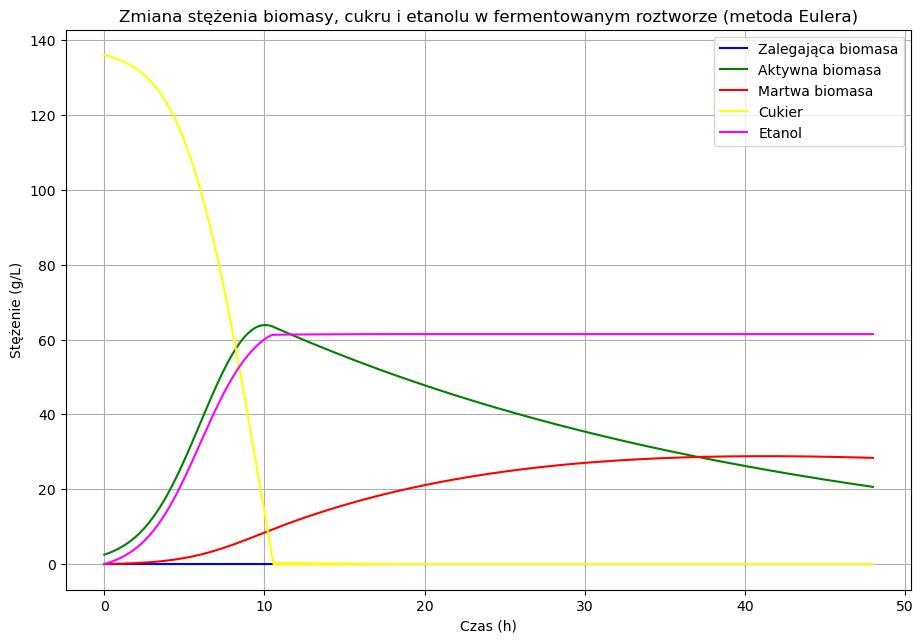

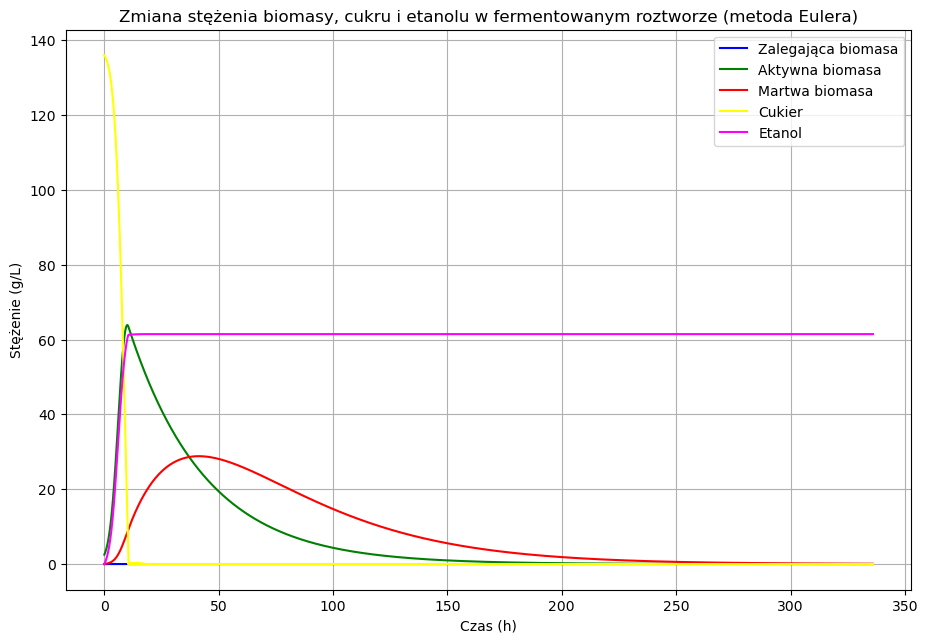

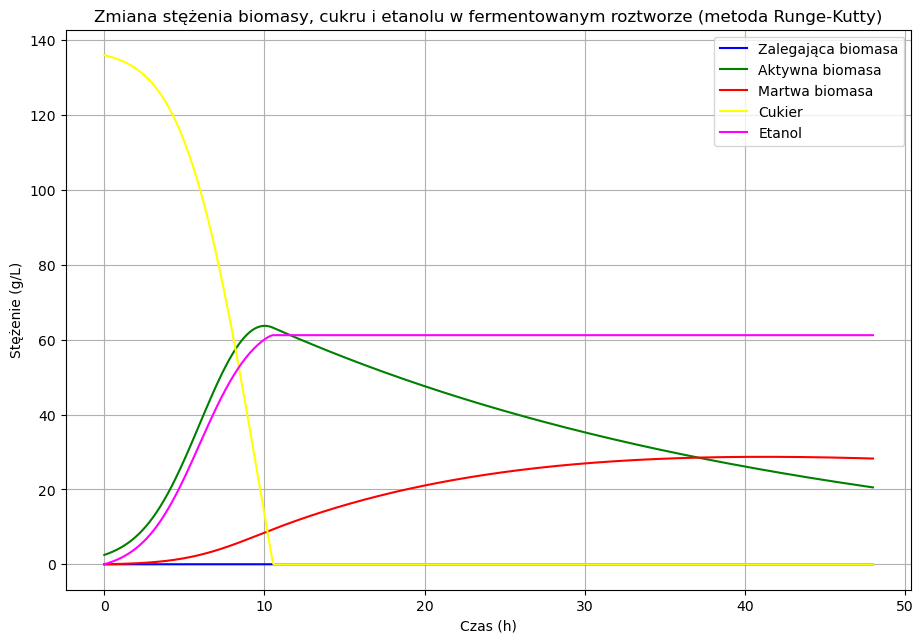

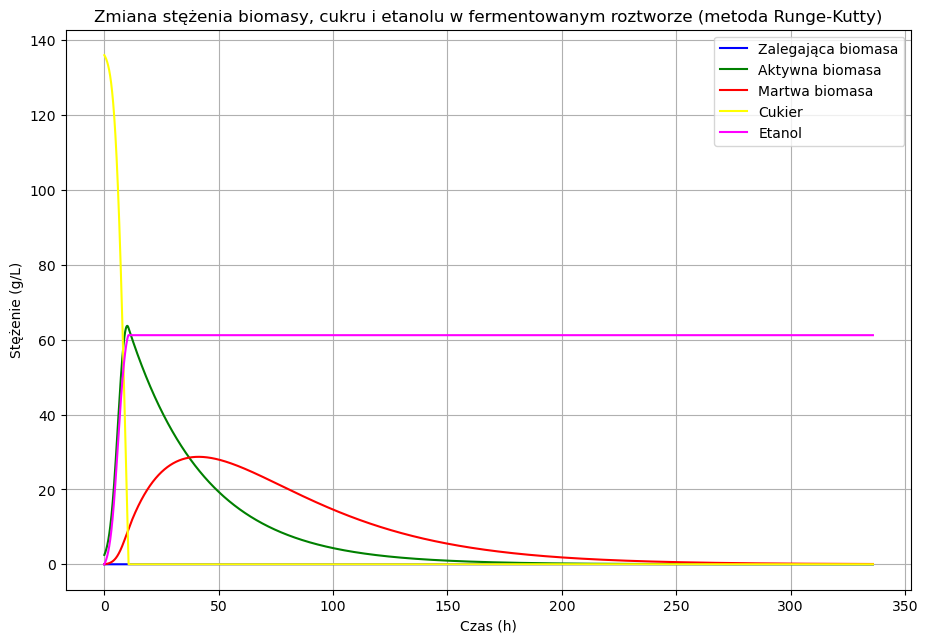

In [20]:
import numpy as np
import matplotlib.pyplot as plt

#Równania modelu
def model_fermentacji(t, X_L, X_A, X_D, S, E):
    mu_X = mu_X0*S /(0.5*S0 + E)
    mu_SD = mu_SD0*0.5*S0 /(0.5*S0 + E)
    mu_S = mu_S0 * S /(K_S + S)
    mu_E = mu_E0 * S /(K_E + S) * (1 - E/(0.5 * S0))
        
    dX_L_dt = -mu_L * X_L
    dX_A_dt = mu_X * X_A + mu_L * X_L - mu_DT * X_A
    dX_D_dt = mu_DT * X_A - mu_SD * X_D
    dS_dt = -mu_S * X_A
    dE_dt = mu_E * X_A
    return np.array([dX_L_dt, dX_A_dt, dX_D_dt, dS_dt, dE_dt])

#Warunki początkowe
mu_L = 0.03
mu_S0 = 0.4
K_S = 0.2
mu_X0 = 0.3
mu_DT =  0.03
mu_SD0 = 0.05
K_E = 3
mu_E0 = 0.5

S0 = 136
X_L0 = 0
X_A0 = 2.5
X_D0 = 0
E0 = 0

#Metoda Eulera
t0 = 0
h = 0.02
t_max1 = 48
t_max2 = 24*14

def rozwiazanie_euler(t0, h, t_max, X_L0, X_A0, X_D0, S0, E0):
    X_L = [X_L0]
    X_A = [X_A0]
    X_D = [X_D0]
    S = [S0]
    E = [E0]
    T = [t0]
    
    k = 0
    t = t0
    while t <= t_max:
        dX_L_dt, dX_A_dt, dX_D_dt, dS_dt, dE_dt = model_fermentacji(t, X_L[k], X_A[k], X_D[k], S[k], E[k])
        X_L.append(X_L[k] + dX_L_dt * h)
        X_A.append(X_A[k] + dX_A_dt * h)
        X_D.append(X_D[k] + dX_D_dt * h)
        S.append(S[k] + dS_dt * h)
        E.append(E[k] + dE_dt * h)
        t += h
        k += 1
        T.append(t)
    return T, X_L, X_A, X_D, S, E

#Rysowanie wykresu
def wykres(T, X_L, X_A, X_D, S, E, tytul_wykresu):
    plt.figure(figsize=(24,16))
    plt.subplot(2, 2, 2)
    plt.plot(T, X_L, label='Zalegająca biomasa', color='blue')
    plt.plot(T, X_A, label='Aktywna biomasa', color='green')
    plt.plot(T, X_D, label='Martwa biomasa', color='red')
    plt.plot(T, S, label='Cukier', color='yellow')
    plt.plot(T, E, label='Etanol', color='magenta')
    plt.xlabel('Czas (h)')
    plt.ylabel('Stężenie (g/L)')
    plt.title(tytul_wykresu)
    plt.legend()
    plt.grid()
    plt.show()

tytul = "Zmiana stężenia biomasy, cukru i etanolu w fermentowanym roztworze (metoda Eulera)"
T, X_L, X_A, X_D, S, E = rozwiazanie_euler(t0, h, t_max1, X_L0, X_A0, X_D0, S0, E0)
wykres(T, X_L, X_A, X_D, S, E, tytul)
T, X_L, X_A, X_D, S, E = rozwiazanie_euler(t0, h, t_max2, X_L0, X_A0, X_D0, S0, E0)
wykres(T, X_L, X_A, X_D, S, E, tytul)

#Metoda Runge-Kutty
def runge_kutty(f, t, y, h):
    k1 = f(t, *y)
    k2 = f(t + 0.5*h, *(y + 0.5* h * k1))
    k3 = f(t + 0.5*h, *(y + 0.5*h * k2))
    k4 = f(t + h, *(y + h * k3))
    return y + (h/6) * (k1 + 2*k2 + 2*k3 +k4)

def rozwiazanie_runge_kutty(t0, h, t_max, X_L0, X_A0, X_D0, S0, E0):
    liczba_krokow = int(t_max/h) + 1
    wartosci = np.zeros((liczba_krokow, 5))
    wartosci[0, :] = [X_L0, X_A0, X_D0, S0, E0]
    t = t0
    T = [t0]
    for i in range(1, liczba_krokow):
        wartosci[i, :] = runge_kutty(model_fermentacji, t, wartosci[i-1, :], h)
        t += h
        T.append(t)
    X_L = wartosci[:, 0]
    X_A = wartosci[:, 1]
    X_D = wartosci[:, 2]
    S = wartosci[:, 3]
    E = wartosci[:, 4]
    return T, X_L, X_A, X_D, S, E

tytul = "Zmiana stężenia biomasy, cukru i etanolu w fermentowanym roztworze (metoda Runge-Kutty)"
T, X_L, X_A, X_D, S, E = rozwiazanie_runge_kutty(t0, h, t_max1, X_L0, X_A0, X_D0, S0, E0)
wykres(T, X_L, X_A, X_D, S, E, tytul)
T, X_L, X_A, X_D, S, E = rozwiazanie_runge_kutty(t0, h, t_max2, X_L0, X_A0, X_D0, S0, E0)
wykres(T, X_L, X_A, X_D, S, E, tytul)

    

## 4. Analiza wyników i wnioski
Powyższe wykresy przedstawiają zmianę w czasie stężenia biomasy, cukru i etanolu w brzeczce. W początkowej fazie fermentacji drożdże konsumują cukier, dzięki czemu zyskują energię do intensywnego rozmnażania się i produkowania etanolu. W momencie, w którym stężenie cukru spada do zera, aktywna biomasa przestaje się rozmnażać, a produkcja etanolu ustaje. Wciąż jeszcze aktywne drożdże z czasem obumierają i osadzają się na dnie. Moment, w którym stężenie drożdży, zarówno aktywnych, jak i martwych, w fermentowanym roztworze spadnie do zera, uznajemy za koniec procesu. Z powyższych wykresów wynika, że cały proces fermentacji zakończy się po około 10 dniach. Tę wartość możemy uznać za zgodną z przepisem podającym 2 tygodnie jako czas fermentacji, biorąc pod uwagę błąd wynikający z różnych warunków otoczenia wpływających na wartości przyjętych stałych.

## Bibliografia
<ol>
    <li id="ARbeermaking1">
        <a href="https://www.youtube.com/watch?v=q8LJb9XBU2U">Adam Ragusea. <cite>Chemistry of beer, part I: Malt to wort</cite>. Youtube, 2021</a>. Dostęp: 2025-01-09.
    </li>
    <li id="ARbeermaking2">
        <a href="https://www.youtube.com/watch?v=qHaWFtikbLQ">Adam Ragusea. <cite>Chemistry of beer, part II: Hops to keg</cite>. Youtube, 2021</a>. Dostęp: 2025-01-09.
    </li>
    <li id="PelczarFermentation">
        <a href="https://www.britannica.com/science/fermentation">Michael J. Pelczar, Rita M. Pelczar. <cite>fermentation, chemical reaction</cite>. Britannica, 2024</a>. Dostęp: 2025-01-09.
    </li>
    <li id="AToroBeermodel">
        B. de Andre&#769s-Toro, J.M. Giro&#769n-Sierra, J.A Lo&#769pez-Orozco, C. Ferna&#769ndez-Conde, J.M. Peinado, F. Garci&#769a-Ochoa. <cite>A Kinetic Model for Beer Production: Simulation Under Industrial Operational Conditions, Mathematics and Computers in Simulation</cite>, tom 48, część 1, strony 65-74. International Association for Mathematics ans Computers in Simulation, 1998.
    </li>
    <li id="DynamicBeerModel">
        Jesu&#769s Miguel Zamundio Lara, Laurent Dewasme, He&#769ctor Herna&#769ndez Escoto, Alain Vande Wouwer. <cite>Parameter Estimation of Dynamic Beer Fermentation Models</cite>. Foods, 2022.
    </li>
    <li id="lecture">
        T. D. Brock. <cite>ESM 219, Lecture 5: Growth and Kinetics</cite>.
    <li id="equations">
        William E. Boyce, Richard C. DiPrima. <cite>Elementary Differential Equations and Boundary Value Problems</cite>, edycja 9. John Wiley & Sons, Inc., 2009.
    </li>
    </li>
    <li id="recipe">
        <a href="https://www.joshuaweissman.com/post/homemade-beer">Joshua Weissman. <cite>Homemade Beer</cite>. 2019</a>. Dostęp: 2025-01-15.
    </li>
    <li id="yeastActive">
        <a href="https://www.themaltmiller.co.uk/blog/how-to-use-liquid-yeast/"><cite>How to use liquid yeast</cite>. The Malt Miller, 2022</a>. Dostęp: 2025-01-15.
    </li>
    <li id="maltSugar">
        <a href="https://fdc.nal.usda.gov/food-details/174867/nutrients">U.S. Department of Agriculture, 2018</a>. Dostęp: 2025-01-15.
    </li>
    <li id="syrupSugar">
        <a href="https://brewshop.no/images_hovedside/Briess%20pilsen%20light%20maltekstrakt%20lme%20produktdatablad.pdf">Briess Malt & Ingrediets Co., 2014</a>. Dostęp: 2025-01-15.
    </li>
</ol>